# 2. Data Exploration and Preprocessing

In this section the data is loaded and explored. The data is preprocessed and transformed into a format that can be used for the machine learning models.
This includes:
* Loading the data from the csv file and loading python libraries
* Exploring Target and Features
    * Checking for missing values
    * Exploring the target, number of accidents by accident types
    * Exploring the features
        * Number of accidents by type and day of the week
        * Number of accidents by type and hour of the day
        * Number of accidents by type and month
        * Number of accidents by type and road type
* Encoding Ordinal and Categorical Features
* Normalizing the data

## 2.1 Import Libraries and Load Data

In [75]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

# Load the data
data = pd.read_csv('roadtrafficaccidentlocations.csv')
data.head() 




,AccidentUID,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,9FC221265B5EE0F0E0430A865E33E0F0,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw405,Freitag,vendredi,Venerdì,Friday,8,08h-09h
1,9FC221265E13E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,17,17h-18h
2,9FC22126601FE0F0E0430A865E33E0F0,at3,Abbiegeunfall,accident en quittant une route,Incidente nello svoltare,Accident when turning left or right,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,10,10h-11h
3,9FC22126614DE0F0E0430A865E33E0F0,at2,Auffahrunfall,accident par tamponnement,Incidente di tamponamento,Accident with rear-end collision,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,13,13h-14h
4,9FC2212663A3E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,10,10h-11h


The Data contains a lot of columns. We are only interessted in the following columns:
* AccidentType_en (Target)
* RoadType_en
* AccidentMonth
* AccidentWeekDay_en
* AccidentHour

These features are considered to be the most important for the prediction of the accident type.

At a later point in time, it might be interesting to include the following columns as targets:
* AccidentSeverityCategory_en
* AccidentInvolvedPederastrian
* AccidentInvolvedBicycle
* AccidentInvolvedMotorcycle

## 2.2 Feature Selection and Target Definition


In [76]:
# Selecting the columns we are interested in
data = data[['AccidentType_en', 'RoadType_en', 'AccidentMonth', 'AccidentWeekDay_en', 'AccidentHour']]
data.head()

,AccidentType_en,RoadType_en,AccidentMonth,AccidentWeekDay_en,AccidentHour
0,Accident with skidding or self-accident,Minor road,1,Friday,8
1,Accident when parking,Minor road,1,Saturday,17
2,Accident when turning left or right,Minor road,1,Thursday,10
3,Accident with rear-end collision,Principal road,1,Thursday,13
4,Accident when parking,Other,1,Wednesday,10


## 2.3 Missing Values

Checking for missing values

In [77]:
for col in data.columns:
    print(col, data[col].isnull().sum())


AccidentType_en 0
RoadType_en 0
AccidentMonth 0
AccidentWeekDay_en 0
AccidentHour 0


No missing values detected. It can be proceeded without further actions.

## 2.4 Target Exploration

At first the Target is explored. For This the number of accidents by type is plotted.

Text(0.5, 1.0, 'Number of Accidents by Type')

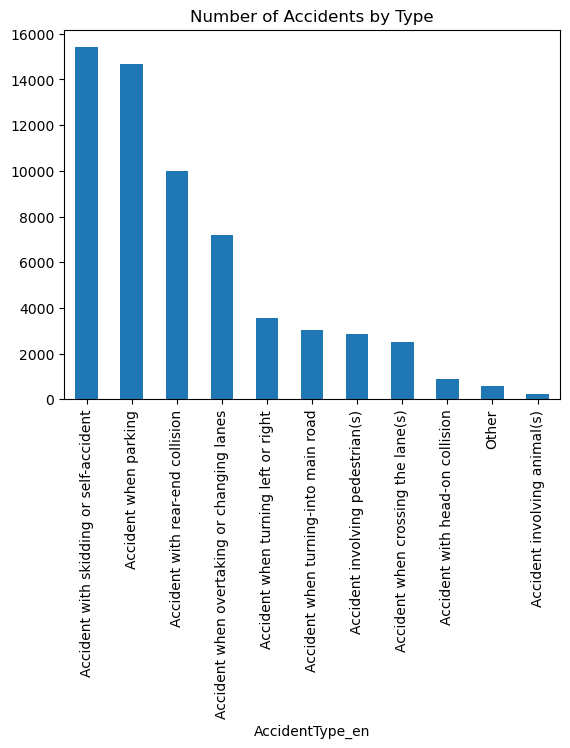

In [78]:
# Number of Accidents according to type
data['AccidentType_en'].value_counts().plot(kind='bar')
plt.title('Number of Accidents by Type')


The data is unbalanced. This need to be taken into account. 
* Type "Other" could be neglected
* Approach: Undersampling, taking only 1000 samples of each type

Balancing the data has to be done in the modeling process. Therefore it is not further considered here. 
The absolute number of accident types is shown below. 

In [79]:
# Number of Accidents of each accident type

data['AccidentType_en'].value_counts()


AccidentType_en
Accident with skidding or self-accident       15405
Accident when parking                         14695
Accident with rear-end collision              10011
Accident when overtaking or changing lanes     7206
Accident when turning left or right            3576
Accident when turning-into main road           3039
Accident involving pedestrian(s)               2855
Accident when crossing the lane(s)             2520
Accident with head-on collision                 903
Other                                           596
Accident involving animal(s)                    252
Name: count, dtype: int64

## 2.5 Feature Exploration
### 2.5.1 Number of Accidents by Type and Day of the Week

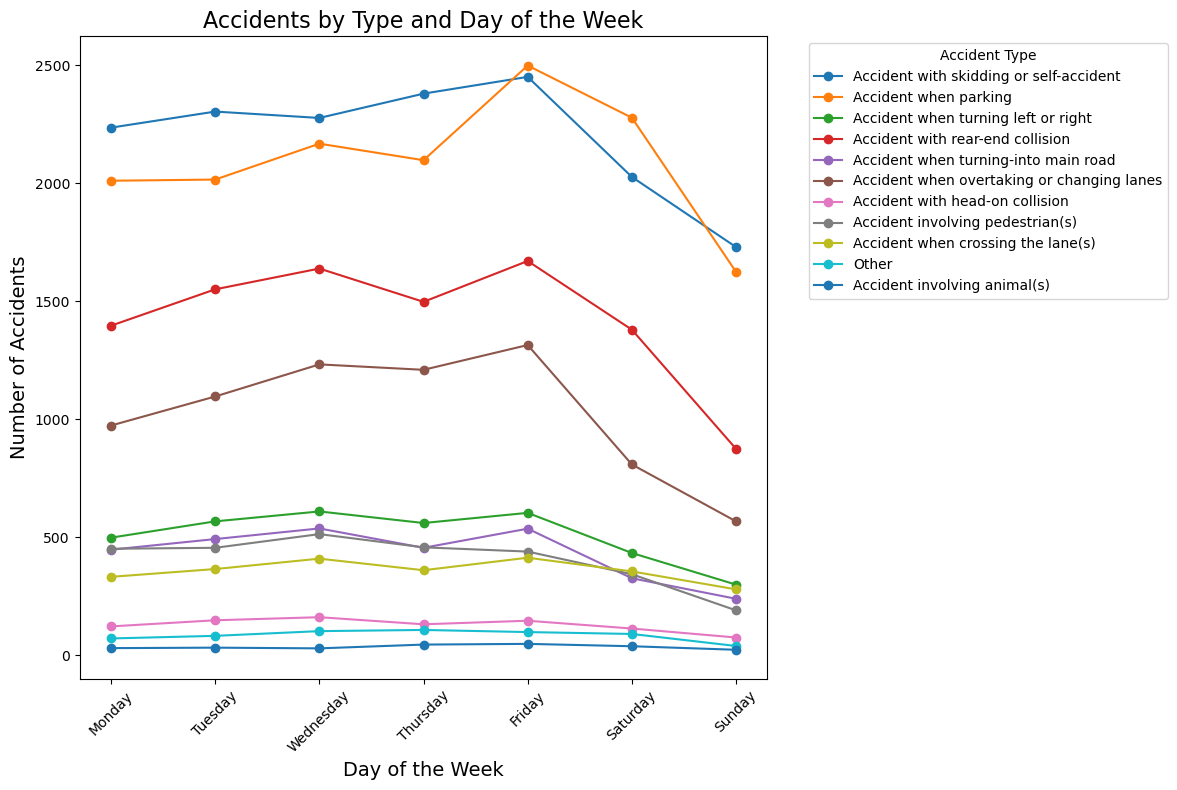

In [80]:
# numer of accidents by accident type and day of the week
# extracting the data
accidents_per_day = {}
for AccidentType in data['AccidentType_en'].unique():
    counts = []
    for AccidentDay in data['AccidentWeekDay_en'].unique():
        count = data.loc[
            (data['AccidentType_en'] == AccidentType) &
            (data['AccidentWeekDay_en'] == AccidentDay)
        ].shape[0]
        counts.append(count)
    accidents_per_day[AccidentType] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
columns = data['AccidentWeekDay_en'].unique() 
result_df = pd.DataFrame.from_dict(accidents_per_day, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentType'}, inplace=True)
result_df.set_index('AccidentType', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Type and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
    
        

The number of accidents is quite constant over the week.
The number of accidents on weekends is lower than on weekdays. But an increase of accidents can be osererved on Fridays.

### 2.5.2 Number of Accidents by Type and Hour of the Day


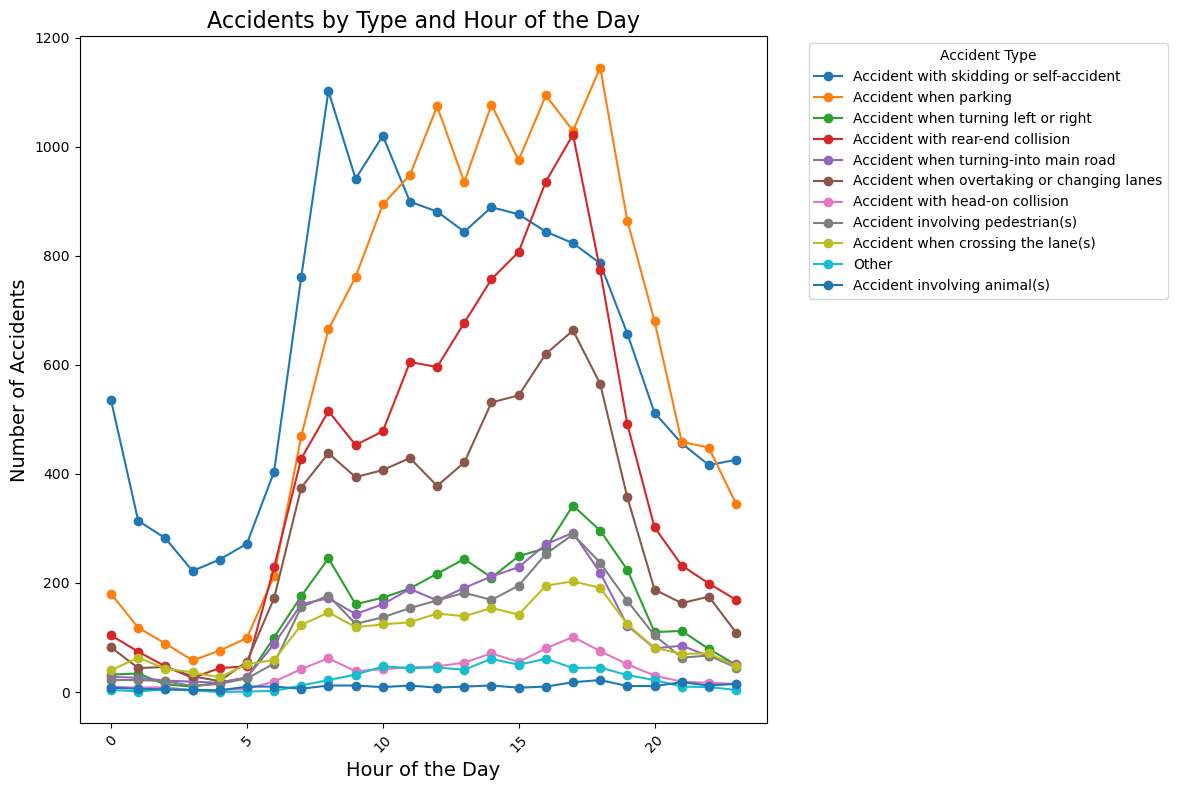

In [81]:
# numer of accidents by accident type and hour of the day
# extracting the data
accidents_per_hour = {}
for AccidentType in data['AccidentType_en'].unique():
    counts = []
    for AccidentHour in data['AccidentHour'].unique():
        count = data.loc[
            (data['AccidentType_en'] == AccidentType) &
            (data['AccidentHour'] == AccidentHour)
        ].shape[0]
        counts.append(count)
    accidents_per_day[AccidentType] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
columns = data['AccidentHour'].unique()  
result_df = pd.DataFrame.from_dict(accidents_per_day, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentType'}, inplace=True)
result_df.set_index('AccidentType', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Type and Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
    

The number of accidents is the lowest between 2 and 5 o'clock. The number of accidents is the highest between 16 and 18 o'clock.
A tendency can be observed that the number of accidents increase towards the afternoon and evening hours.

### 2.5.3 Number of Accidents by Type and Month

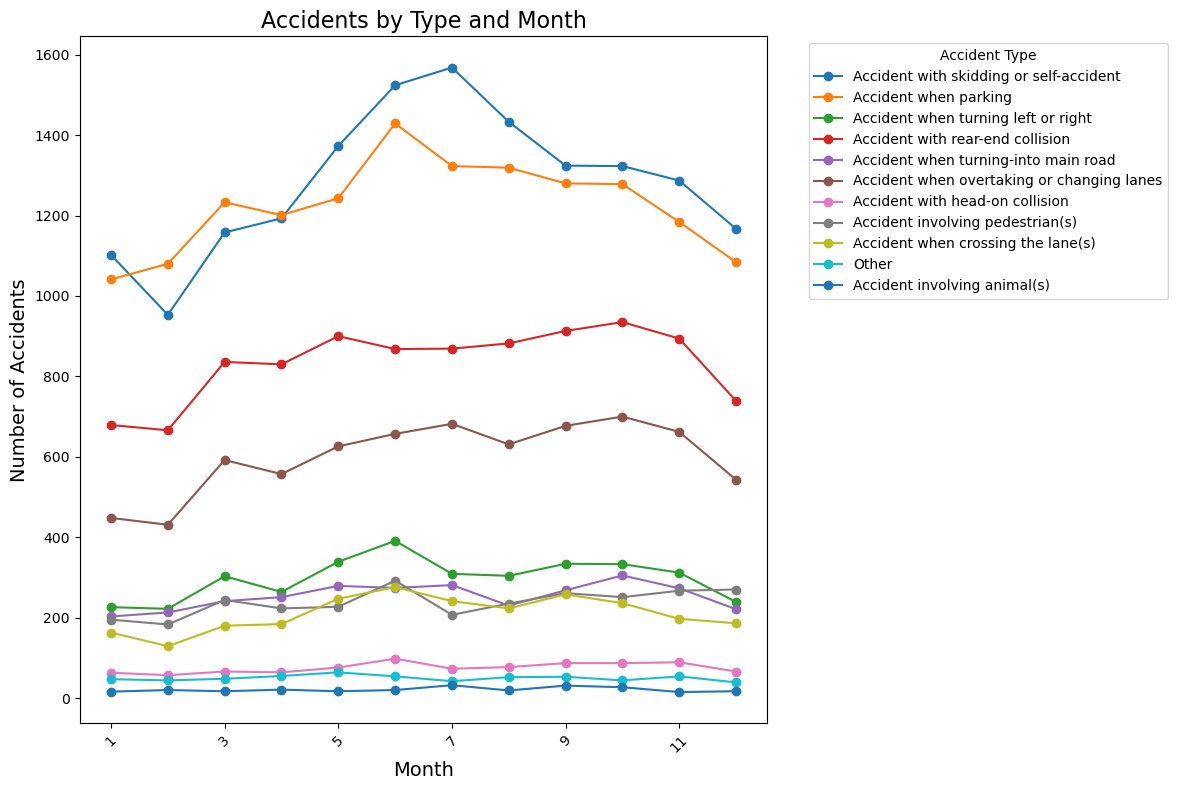

In [82]:
# numer of accidents by accident type and month
# extracting the data
accidents_per_month = {}
for AccidentType in data['AccidentType_en'].unique():
    counts = []
    for AccidentMonth in data['AccidentMonth'].unique():
        count = data.loc[
            (data['AccidentType_en'] == AccidentType) &
            (data['AccidentMonth'] == AccidentMonth)
        ].shape[0]
        counts.append(count)
    accidents_per_day[AccidentType] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
columns = data['AccidentMonth'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_day, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentType'}, inplace=True)
result_df.set_index('AccidentType', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot

plt.title('Accidents by Type and Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The number of accidents seems to be lower in winter months. The number of accidents is the higher in summer months. The difference is not that remarkable. 

### 2.5.4 Number of Accidents by Type and Road Type

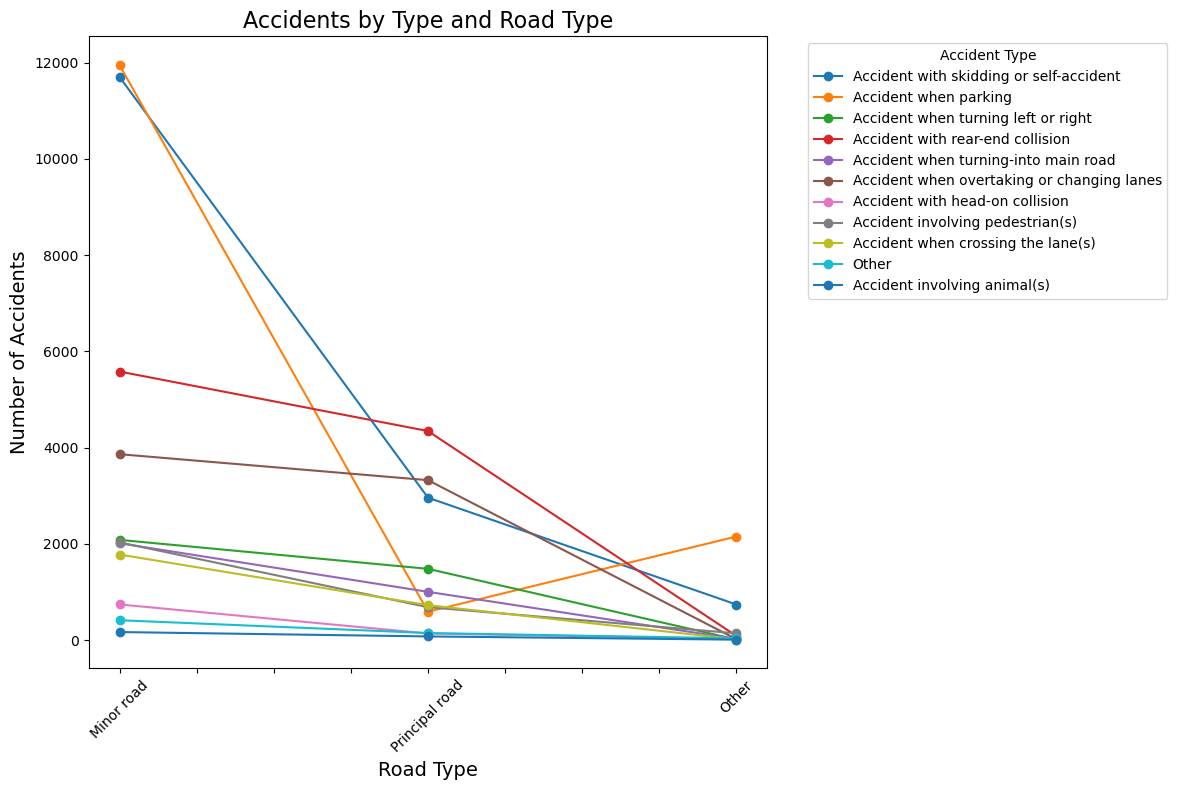

In [83]:
# numer of accidents by accident type and road type
# extracting the data
accidents_per_road = {}

for AccidentType in data['AccidentType_en'].unique():
    counts = []
    for RoadType in data['RoadType_en'].unique():
        count = data.loc[
            (data['AccidentType_en'] == AccidentType) &
            (data['RoadType_en'] == RoadType)
        ].shape[0]
        counts.append(count)
    accidents_per_road[AccidentType] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Minor road', 'Principal road', 'Other']
columns = data['RoadType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_road, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentType'}, inplace=True)
result_df.set_index('AccidentType', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Type and Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
    
plt.show()



There are more accidents on minor roads than on principal roads. The number of accidents on other road types is the lowest.

## 2.6 Encoding
The data has to be transformed into numerical values.
Firstly the unique values of the columns are checked.


In [84]:
# Check the unique values of the columns
for col in data.columns:
    print(col, data[col].unique())

AccidentType_en ['Accident with skidding or self-accident' 'Accident when parking'
 'Accident when turning left or right' 'Accident with rear-end collision'
 'Accident when turning-into main road'
 'Accident when overtaking or changing lanes'
 'Accident with head-on collision' 'Accident involving pedestrian(s)'
 'Accident when crossing the lane(s)' 'Other'
 'Accident involving animal(s)']
RoadType_en ['Minor road' 'Principal road' 'Other']
AccidentMonth [ 1  2  3  4  5  6  7  8  9 10 11 12]
AccidentWeekDay_en ['Friday' 'Saturday' 'Thursday' 'Wednesday' 'Monday' 'Tuesday' 'Sunday']
AccidentHour [ 8 17 10 13 14  7  9 12 19 23 16  4 11 18 15  1  2 20  0  6 21  5 22  3]


Now the data has to be transformed into numerical values. 
* AccidentType_en --> LabelEncoder
* RoadType_en --> OneHotEncoding or OrdinalEncoding
* AccidentMonth --> already numerical
* AccidentWeekDay_en --> OrdinalEncoding or CyclicEncoding
* AccidentHour --> already numerical

Encoding of RoadType_en will be done with OneHotEncoding, because we didn't want to introduce a ranking of the different road types. This procedures is suitable for the planed models kNN, RandomForest and SVM. Unfortunately this will increase the dimensionality of the data.
Alternatively we could use OrdinalEncoding  which would have been quite straight forward. 

Encoding of AccidentWeekDay_en will be done with OrdinalEncoding. This is simple and efficient. A drawback is that a possible cyclic pattern will not be considered. 
To ensure that the cyclic pattern is considered, we could use a CyclicEncoding. This would be more complex and is not implemented here.

In [85]:
# Transform the data


le = preprocessing.LabelEncoder()
data['AccidentType_en'] = le.fit_transform(data['AccidentType_en'])

# OrdinalEncoding for AccidentWeekDay_en
OrdEn = preprocessing.OrdinalEncoder()
data['AccidentWeekDay_en'] = OrdEn.fit_transform(data['AccidentWeekDay_en'].values.reshape(-1,1))

# OneHotEncoding for RoadType_en
OHE = preprocessing.OneHotEncoder()
OHE_RoadType_en = data['RoadType_en'].values.reshape(-1,1)
OHE_RoadType_en = OHE.fit_transform(OHE_RoadType_en).toarray()

# Delete RoadType_en from pandas DataFrame and add the new columns from the OneHotEncoding
data.drop('RoadType_en', axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(OHE_RoadType_en, columns=['Minor road', 'Principal road', 'Other road type'])], axis=1)

data.head()

,AccidentType_en,AccidentMonth,AccidentWeekDay_en,AccidentHour,Minor road,Principal road,Other road type
0,9,1,0.0,8,1.0,0.0,0.0
1,4,1,2.0,17,1.0,0.0,0.0
2,5,1,4.0,10,1.0,0.0,0.0
3,8,1,4.0,13,0.0,0.0,1.0
4,4,1,6.0,10,0.0,1.0,0.0


Now there is only numeric data which can be normalized.

## 2.7 Normalization
The data should be normalized. To find out which normalization is the best, the following were tested: 
* StandardScaler
* MinMaxScaler
* RobustScaler
* Normalizer
* PowerTransformer
* QuantileTransformer

The normalized data was plotted in a histogram and the best normalization was chosen. Criteria for the best normalization were: 
* The data is centered around 0
* The data is scaled to a certain range
* The data is normally distributed
* The data is not affected by outliers 

array([[<Axes: title={'center': 'AccidentType_en'}>,
        <Axes: title={'center': 'AccidentMonth'}>,
        <Axes: title={'center': 'AccidentWeekDay_en'}>],
       [<Axes: title={'center': 'AccidentHour'}>,
        <Axes: title={'center': 'Minor road'}>,
        <Axes: title={'center': 'Principal road'}>],
       [<Axes: title={'center': 'Other road type'}>, <Axes: >, <Axes: >]],
      dtype=object)

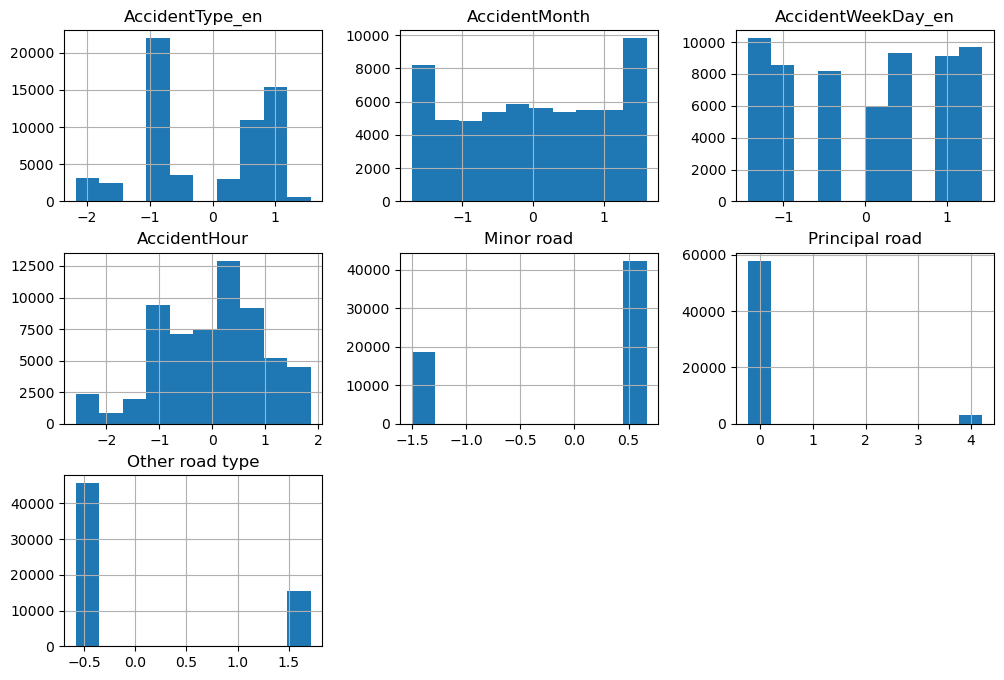

In [86]:
# Normalize the data with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.hist(figsize=(12, 8))




array([[<Axes: title={'center': 'AccidentType_en'}>,
        <Axes: title={'center': 'AccidentMonth'}>,
        <Axes: title={'center': 'AccidentWeekDay_en'}>],
       [<Axes: title={'center': 'AccidentHour'}>,
        <Axes: title={'center': 'Minor road'}>,
        <Axes: title={'center': 'Principal road'}>],
       [<Axes: title={'center': 'Other road type'}>, <Axes: >, <Axes: >]],
      dtype=object)

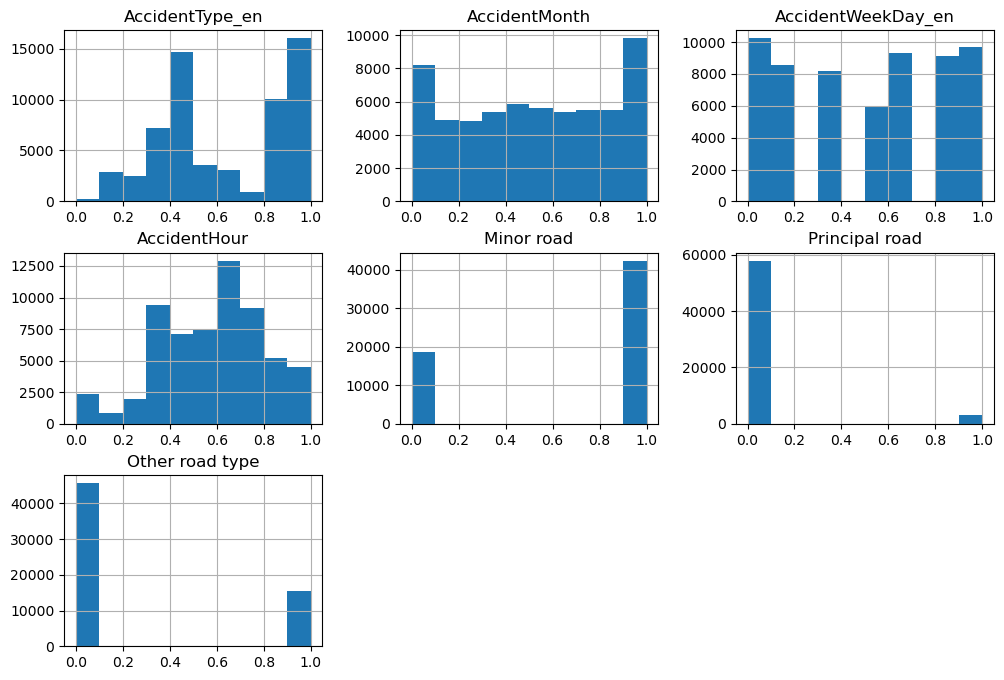

In [87]:
# Normalize the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.hist(figsize=(12, 8))


array([[<Axes: title={'center': 'AccidentType_en'}>,
        <Axes: title={'center': 'AccidentMonth'}>,
        <Axes: title={'center': 'AccidentWeekDay_en'}>],
       [<Axes: title={'center': 'AccidentHour'}>,
        <Axes: title={'center': 'Minor road'}>,
        <Axes: title={'center': 'Principal road'}>],
       [<Axes: title={'center': 'Other road type'}>, <Axes: >, <Axes: >]],
      dtype=object)

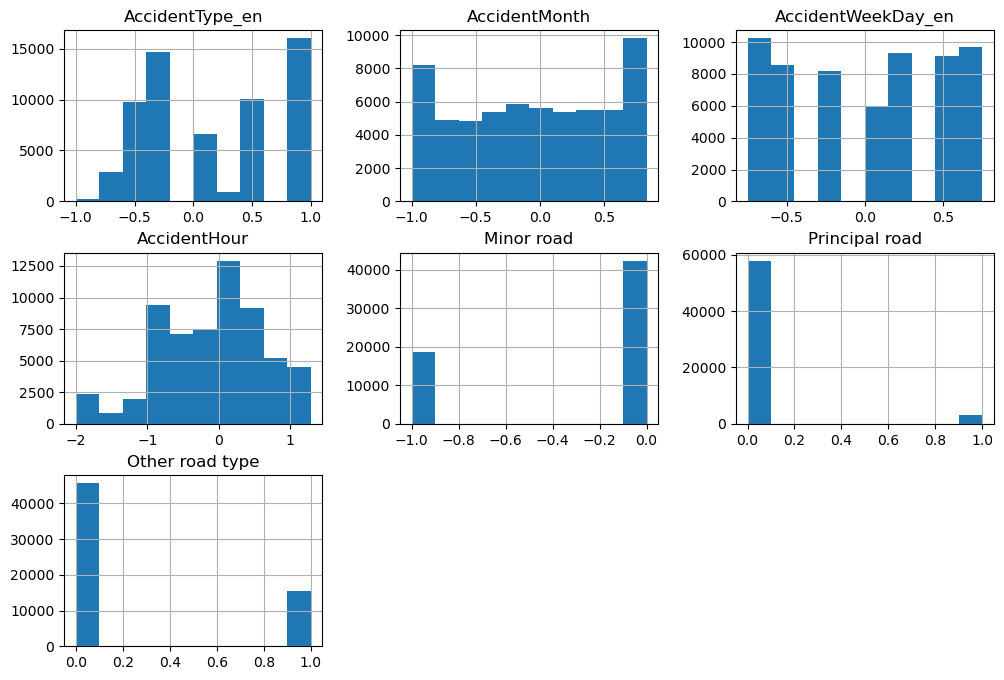

In [88]:
# Normalize the data with RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.hist(figsize=(12, 8))


array([[<Axes: title={'center': 'AccidentType_en'}>,
        <Axes: title={'center': 'AccidentMonth'}>,
        <Axes: title={'center': 'AccidentWeekDay_en'}>],
       [<Axes: title={'center': 'AccidentHour'}>,
        <Axes: title={'center': 'Minor road'}>,
        <Axes: title={'center': 'Principal road'}>],
       [<Axes: title={'center': 'Other road type'}>, <Axes: >, <Axes: >]],
      dtype=object)

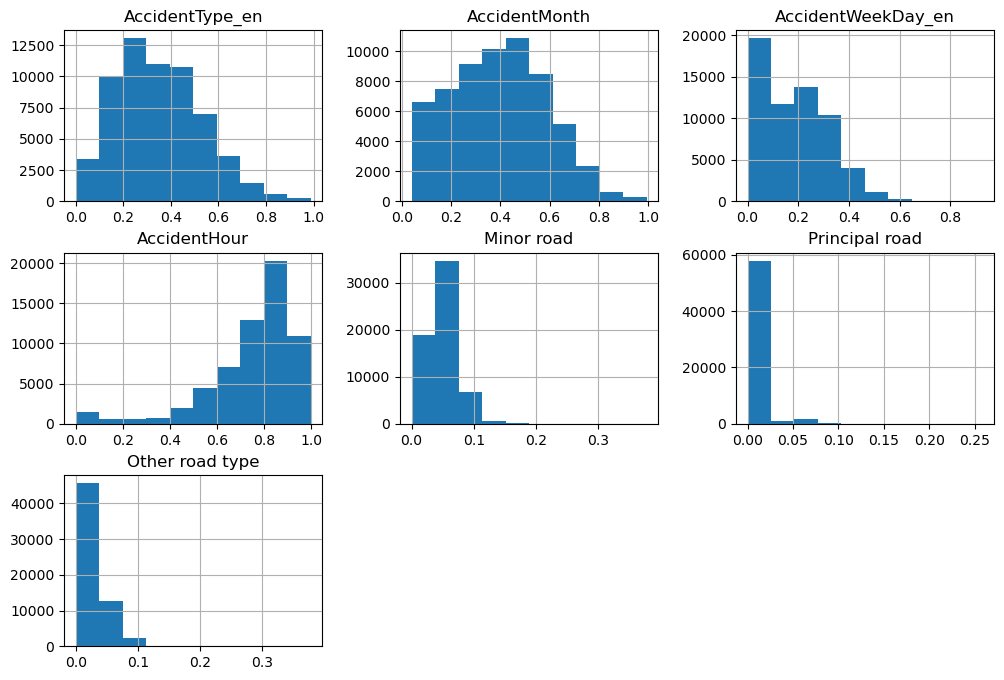

In [89]:
# Normalize the data with Normalizer
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.hist(figsize=(12, 8))


* new Target and additional features
* Normalization try and error
* LabelEncoding different 
* 